## Running Scripts and Pipelines

DataLad allows us to add any type of data to our existing dataset and track it. So far however, this has been a manual process where we added data and then ran `datalad save` to commit it to our repo. When modifying existing files, we ran `datalad get` to download and `datalad unlock` to make files modifiable, modified the files, and then ran `datalad save` again.

However, in most data analysis projects, we don't manually generate and modify data. Instead, we use programs and scripts that do so. While we could transfer this approach to running scripts, this would be rather tedious because we would always have to make sure the required files are present and unlocked and save new files after the script ran.

To make life easier, DataLad provides a `run` command. This command can execute any shell command (e.g., running a Python script), make sure that inputs are available and keep track of outputs. It can even rerun commands or whole pipelines to easily reproduce results.

We are going to test the run command using the penguins dataset. Execute the cell below to download the dataset, change the directory to `penguins/` and print the dataset's contents. The data contains some `code/`, some `data/` (CSV files) and some `example/` images of different penguins.

In [ ]:
!datalad clone https://gin.g-node.org/obi/penguins
%cd penguins
!ls **

Cloning:   0%|                             | 0.00/2.00 [00:00<?, ? candidates/s]
Enumerating: 0.00 Objects [00:00, ? Objects/s]
                                              
Counting:   0%|                                | 0.00/106 [00:00<?, ? Objects/s]
                                                                                
Compressing:   0%|                            | 0.00/79.0 [00:00<?, ? Objects/s]
                                                                                
Receiving:   0%|                               | 0.00/106 [00:00<?, ? Objects/s]
                                                                                
Resolving:   0%|                               | 0.00/15.0 [00:00<?, ? Deltas/s]
install(ok): /home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins (dataset)
/home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_command

## Datalad, Run!

### Background

The basic syntax of the run command looks like this: `datalad run "<command>"`.
Here, `<command>` can be any command that you could execute in a terminal, for example `"python script.py"`.
DataLad will automatically save any new files generated by the `run` command and write a commit message.

### Exercises

In the following exercises you are going to use `datalad run` to execute shell commands and run a Python script. Here are the commands you need to know:

| Command | Description |
| --- | --- |
|`datalad run "python script.py"` | Run the Python script `script.py` |
|`datalad run -m "run script" "python script.py"` | Run the Python script `script.py` and add the commit message `"run script"`|
|`echo "text" > file.txt` | Write "text" to `file.txt` |
|`echo "text" >> file.txt` | Append "text" to `file.txt` |
| `git log` | View the dataset's history stored in the `git log` |
| `git log -1` | View the last entry in `git log` |

**Example**: Use `datalad run` to run an `echo` command that writes the text `'Penguins are cool'` to `penguins.md`.

**NOTE**: When using quotations inside quotations, we must use different ones, e.g., double for the outer and single for the inner quotation: `" '' "`

In [2]:
!datalad run "echo 'Penguins are cool'>penguins.md"

[INFO   ] == Command start (output follows) ===== 
[INFO   ] == Command exit (modification check follows) ===== 
run(ok): /home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins (dataset) [echo 'Penguins are cool'>penguins.md]
Total: 0.00 datasets [00:00, ? datasets/s]
Total:   0%|                                    | 0.00/18.0 [00:00<?, ? Bytes/s]
add(ok): penguins.md (file)                     
save(ok): . (dataset)                           


**Exercise**: Check the last entry in `git log` to see the message generated by the run command.

In [3]:
!git log -1

commit 7dd8c4acd73ecc8468aa918219d6f84f4f7b3408 (HEAD -> master)
Author: obi <ole.bialas@posteo.de>
Date:   Wed Dec 3 16:19:10 2025 +0100

    [DATALAD RUNCMD] echo 'Penguins are cool'>penguins.md
    
    === Do not change lines below ===
    {
     "chain": [],
     "cmd": "echo 'Penguins are cool'>penguins.md",
     "dsid": "3a8aacc5-85f0-4114-adee-fcfa7d21a5df",
     "exit": 0,
     "extra_inputs": [],
     "inputs": [],
     "outputs": [],
     "pwd": "."
    }
    ^^^ Do not change lines above ^^^


**Exercise**: The `echo` command below appends another line to `penguins.md`. Wrap it with `datalad run` and execute it. Then check the last entry in `git log` to see the commit message created by the run command.

In [4]:
!echo 'The Linux mascot is a penguin '>>penguins.md

zsh:1: permission denied: penguins.md


In [5]:
!datalad run "echo 'The Linux mascot is a penguin '>README.md"
!git log -1

[INFO   ] == Command start (output follows) ===== 
[INFO   ] == Command exit (modification check follows) ===== 
run(ok): /home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins (dataset) [echo 'The Linux mascot is a penguin '>RE...]
Total: 0.00 datasets [00:00, ? datasets/s]
Total:   0%|                                    | 0.00/31.0 [00:00<?, ? Bytes/s]
add(ok): README.md (file)                       
save(ok): . (dataset)                           
commit 47847a688e5591b810726eb16d5de68327bf24ab (HEAD -> master)
Author: obi <ole.bialas@posteo.de>
Date:   Wed Dec 3 16:19:15 2025 +0100

    [DATALAD RUNCMD] echo 'The Linux mascot is a penguin '>RE...
    
    === Do not change lines below ===
    {
     "chain": [],
     "cmd": "echo 'The Linux mascot is a penguin '>README.md",
     "dsid": "3a8aacc5-85f0-4114-adee-fcfa7d21a5df",
     "exit": 0,
     "extra_inputs": [],
     "inputs": [],
     "outputs": [],
   

**Exercise**: Use `datalad run` to execute an echo command that lists all penguin species in this dataset (adelie, chinstrap, gentoo) in the file `"species.txt"` and show the last entry in `git log`.

**BONUS**: Add a custom commit message

In [6]:
!datalad run -m "listing species" "echo 'adelie chinstrap gentoo' > species.txt"
!git log -1

[INFO   ] == Command start (output follows) ===== 
[INFO   ] == Command exit (modification check follows) ===== 
run(ok): /home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins (dataset) [echo 'adelie chinstrap gentoo' > species...]
Total: 0.00 datasets [00:00, ? datasets/s]
Total:   0%|                                    | 0.00/24.0 [00:00<?, ? Bytes/s]
add(ok): species.txt (file)                     
save(ok): . (dataset)                           
commit 1ec05ba6cb746f23707c6d2f788627a75cee2c05 (HEAD -> master)
Author: obi <ole.bialas@posteo.de>
Date:   Wed Dec 3 16:19:20 2025 +0100

    [DATALAD RUNCMD] listing species
    
    === Do not change lines below ===
    {
     "chain": [],
     "cmd": "echo 'adelie chinstrap gentoo' > species.txt",
     "dsid": "3a8aacc5-85f0-4114-adee-fcfa7d21a5df",
     "exit": 0,
     "extra_inputs": [],
     "inputs": [],
     "outputs": [],
     "pwd": "."
    }
    ^^^ Do n

**Exercise**: Try to use `datalad run` to execute the Python script `code/aggregate_culmen_data.py`, what error are you observing?

In [7]:
!datalad run "python code/aggregate_culmen_data.py"

[INFO   ] == Command start (output follows) ===== 
Searching for table files in /home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins
Found files
/home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins/data/table_219.csv
/home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins/data/table_220.csv
/home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins/data/table_221.csv
Traceback (most recent call last):
  File "/home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins/code/aggregate_culmen_data.py", line 15, in <module>
    df.append(pd.read_csv(file))
              ^^^^^^^^^^^^^^^^^
  File "/home/olebi/projects/Introductio

## Handling Inputs and Outputs

### Background

In the previous exercise, we got an error because the `aggregate_culmen_data.py` script requires the CSV files in `data/` as input but we haven't downloaded those file contents yet. While we could simply do `datalad get data` and then rerun the command, there is a better way: we can give the run command the required `--input` and it will automatically get the content if required. We can also add the `--output` and the run command will automatically unlock the required files which allows us to overwrite them.

### Exercises

In this section, you are going to use the `--input` and `--output` options to let `datalad run` handle the downloading and unlocking of the required files automatically. Here are the commands you need to know:

| Command | Description |
| --- | --- |
|`datalad run --input "data.csv" "python script.py"` | Run `script.py` with input `"data.csv"` | 
|`datalad run --input "data/" "python script.py"` | Run `script.py` with the whole `"data/"` folder as input | 
|`datalad run --output "figure.png" "python script.py"` | Run `script.py` with the output `"figure.png"`|
|`datalad run --input "data.csv" --output "figure.png" "python script.py"` | Run `script.py` with input `"data.csv"` and output `"figure.png"`|


**Exercise**: Repeat the `datalad run` command from the previous exercise but add all CSV files in `data/` as `--input`.

In [8]:
!datalad run --input "data/*.csv" "python code/aggregate_culmen_data.py"

[INFO   ] Making sure inputs are available (this may take some time) 
Total:   0%|                                   | 0.00/53.9k [00:00<?, ? Bytes/s]
Get data/table_221.csv:   0%|                  | 0.00/11.3k [00:00<?, ? Bytes/s]
Total:  21%|█████▍                    | 11.3k/53.9k [00:00<00:01, 31.1k Bytes/s]
Get data/table_219.csv:   0%|                  | 0.00/23.8k [00:00<?, ? Bytes/s]
Get data/table_219.csv:  69%|██████▏  | 16.4k/23.8k [00:00<00:00, 52.5k Bytes/s]
Total:  65%|████████████████▉         | 35.0k/53.9k [00:00<00:00, 44.3k Bytes/s]
Get data/table_220.csv:   0%|                  | 0.00/18.9k [00:00<?, ? Bytes/s]
get(ok): data/table_221.csv (file) [from origin...]
get(ok): data/table_219.csv (file) [from origin...]
get(ok): data/table_220.csv (file) [from origin...]
[INFO   ] == Command start (output follows) ===== 
Searching for table files in /home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/pengui

**Exercise**: Repeat the datalad command from the previous exercise - what does the error message tell you?

In [9]:
!datalad run --input "data" "python code/aggregate_culmen_data.py"

[INFO   ] Making sure inputs are available (this may take some time) 
[INFO   ] == Command start (output follows) ===== 
Searching for table files in /home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins
Found files
/home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins/data/table_219.csv
/home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins/data/table_220.csv
/home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins/data/table_221.csv
Writing data from 342 penguins to /home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins/results/penguin_culmens.csv
Traceback (most recent call last):
  File "/home/olebi/projects/Intro

**Exercise**: Repeat the run command from the previous exercise but add `"results/penguin_culmens.csv"` as `--output`.

In [10]:
!datalad run --input "data" --output "results/penguin_culmens.csv" "python code/aggregate_culmen_data.py"

[INFO   ] Making sure inputs are available (this may take some time) 
unlock(ok): results/penguin_culmens.csv (file)  
[INFO   ] == Command start (output follows) =====                               
Searching for table files in /home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins
Found files
/home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins/data/table_219.csv
/home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins/data/table_220.csv
/home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins/data/table_221.csv
Writing data from 342 penguins to /home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins/results/penguin_cu

**Exercise**: Use `datalad run` to execute the Python script `code/plot_culmen_length_vs_depth.py` with `results/penguin_culmens.csv` as `--input` and `results/culmen_length_vs_depth.png` as `--output`. Then, execute the cell below to plot the graph created.

In [11]:
!datalad run --input "results/penguin_culmens.csv" --output "results/culmen_length_vs_depth.png" "python code/plot_culmen_length_vs_depth.py"

[INFO   ] Making sure inputs are available (this may take some time) 
[INFO   ] == Command start (output follows) ===== 
Loading data ...
Creating plot ...
Saving figure to /home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins/results/culmen_length_vs_depth.png
[INFO   ] == Command exit (modification check follows) ===== 
run(ok): /home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins (dataset) [python code/plot_culmen_length_vs_depth....]
Total: 0.00 datasets [00:00, ? datasets/s]
Total:   0%|                                    | 0.00/157k [00:00<?, ? Bytes/s]
add(ok): results/culmen_length_vs_depth.png (file)A
save(ok): . (dataset)                           


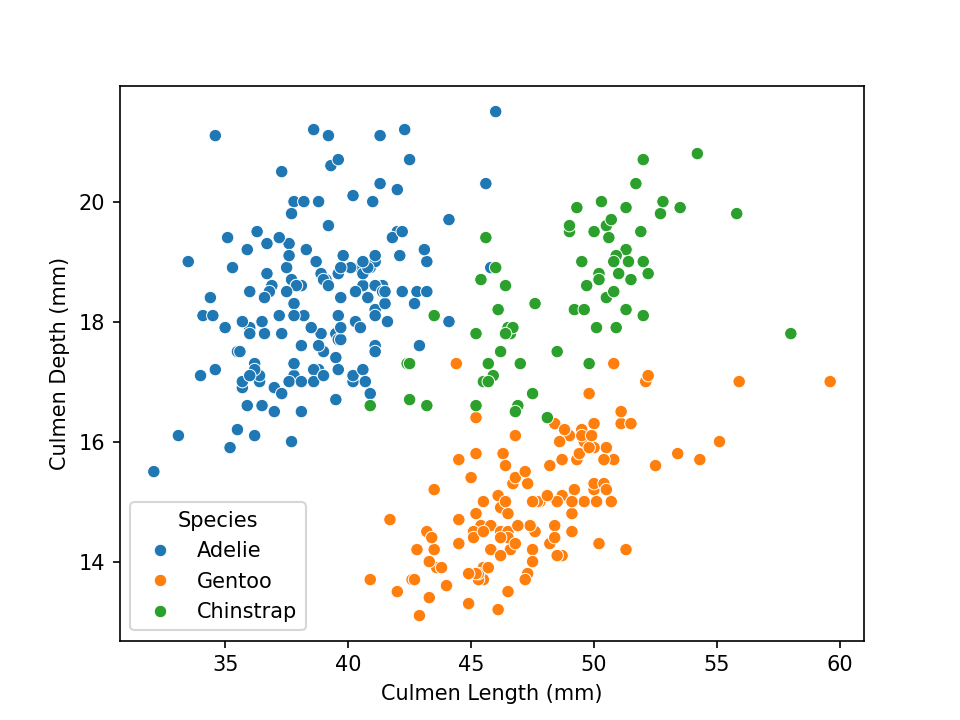

In [28]:
from IPython.display import Image
Image("results/culmen_length_vs_depth.png", width=600)

## From Single Scripts to Analysis Pipelines

### Background

Another nice feature of DataLad is the ability to `rerun` certain commands. This allows you to quickly rerun an analysis step after making changes to a script without having to retype the whole run command.
You can also rerun all steps `--since` a certain commit.
So, if your analysis consists of a series of `datalad run` commands, you can reproduce the entire pipeline with a single command!

### Exercises

In the following exercises, you are going to use the `rerun` command to repeat individual commands and rerun the entire analysis. Here are the commands you need to know:

| Command | Description |
| --- | --- |
| `datalad rerun a268d8ca22b6` | Rerun the command from the `git log` with the checksum starting with `a268d8ca22b6e87959` |
| `datalad rerun --since a268d8ca22b6` | Rerun ALL commands `--since` the one with the checksum starting with `a268d8ca22b6e87959` |
| `git log -2` | View the last two entries in `git log` |
| `git log --oneline` | Get a compact view of the `git log` |

**Exercise**: View the last entry of the `git log` to see the message created by the last run command and note the commit hash (the first few elements are enough).

In [13]:
!git log -1

commit 8a40afba9e95d13c60c16fdfddb04d1a39241d22 (HEAD -> master)
Author: obi <ole.bialas@posteo.de>
Date:   Wed Dec 3 16:19:39 2025 +0100

    [DATALAD RUNCMD] python code/plot_culmen_length_vs_depth....
    
    === Do not change lines below ===
    {
     "chain": [],
     "cmd": "python code/plot_culmen_length_vs_depth.py",
     "dsid": "3a8aacc5-85f0-4114-adee-fcfa7d21a5df",
     "exit": 0,
     "extra_inputs": [],
     "inputs": [
      "results/penguin_culmens.csv"
     ],
     "outputs": [
      "results/culmen_length_vs_depth.png"
     ],
     "pwd": "."
    }
    ^^^ Do not change lines above ^^^


**Exercise**: Rerun the last `datalad run` command.

In [14]:
!datalad rerun 8a40afb

[INFO   ] run commit 8a40afb; (python code/plot_...) 
[INFO   ] Making sure inputs are available (this may take some time) 
unlock(ok): results/culmen_length_vs_depth.png (file)
[INFO   ] == Command start (output follows) =====                               
Loading data ...
Creating plot ...
Saving figure to /home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins/results/culmen_length_vs_depth.png
[INFO   ] == Command exit (modification check follows) ===== 
run(ok): /home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins (dataset) [python code/plot_culmen_length_vs_depth....]
Total: 0.00 datasets [00:00, ? datasets/s]
Total:   0%|                                    | 0.00/157k [00:00<?, ? Bytes/s]
add(ok): results/culmen_length_vs_depth.png (file)A
action summary:                                                                 
  add (ok:

**Exercise**: Check the `git log`. Did rerunning the command create a new entry?

In [16]:
!git log --oneline -2

8a40afb (HEAD -> master) [DATALAD RUNCMD] python code/plot_culmen_length_vs_depth....
9812ffb [DATALAD RUNCMD] python code/aggregate_culmen_data.py


**Exercise**: Open `code/plot_culmen_length_vs_depth.py` and change the `dpi` in `fig.savefig()` to 150. Then, save the file and use `datalad save` to track the changes. Now rerun the same run command and check the `git log`. Did the rerun create a commit message this time?

In [17]:
!datalad save
!datalad rerun 8a40afb
!git log --oneline -3

Total: 0.00 datasets [00:00, ? datasets/s]
Total:   0%|                                     | 0.00/523 [00:00<?, ? Bytes/s]
add(ok): code/plot_culmen_length_vs_depth.py (file)
save(ok): . (dataset)                           
action summary:                                                                 
  add (ok: 1)
  save (ok: 1)
[INFO   ] run commit 8a40afb; (python code/plot_...) 
[INFO   ] Making sure inputs are available (this may take some time) 
unlock(ok): results/culmen_length_vs_depth.png (file)
[INFO   ] == Command start (output follows) =====                               
Loading data ...
Creating plot ...
Saving figure to /home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins/results/culmen_length_vs_depth.png
[INFO   ] == Command exit (modification check follows) ===== 
run(ok): /home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelin

**Exercise**: Find the commit hash of the entry just before the first run command and rerun everything `--since` that commit (i.e. the full "analysis" pipeline)

In [24]:
!git log --oneline

07ad6c4 (HEAD -> master) [DATALAD RUNCMD] python code/plot_culmen_length_vs_depth....
f808042 [DATALAD] Recorded changes
8a40afb [DATALAD RUNCMD] python code/plot_culmen_length_vs_depth....
9812ffb [DATALAD RUNCMD] python code/aggregate_culmen_data.py
1ec05ba [DATALAD RUNCMD] listing species
47847a6 [DATALAD RUNCMD] echo 'The Linux mascot is a penguin '>RE...
7dd8c4a [DATALAD RUNCMD] echo 'Penguins are cool'>penguins.md
0e8aebb (origin/master, origin/HEAD) update URL
e30123b add content
4c2b9dc [DATALAD] new dataset


In [25]:
!datalad rerun --since 0e8aebb

[INFO   ] run commit 7dd8c4a; (echo 'Penguins ar...) 
unlock(ok): penguins.md (file)                  
[INFO   ] == Command start (output follows) =====                               
[INFO   ] == Command exit (modification check follows) ===== 
run(ok): /home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins (dataset) [echo 'Penguins are cool'>penguins.md]
Total: 0.00 datasets [00:00, ? datasets/s]
Total:   0%|                                    | 0.00/18.0 [00:00<?, ? Bytes/s]
add(ok): penguins.md (file)                     
[INFO   ] run commit 47847a6; (echo 'The Linux m...)                            
[INFO   ] == Command start (output follows) ===== 
[INFO   ] == Command exit (modification check follows) ===== 
run(ok): /home/olebi/projects/Introduction-to-Scientific-Data-Management-with-DataLad/notebooks/04_running_commands_and_pipelines/penguins (dataset) [echo 'The Linux mascot is a penguin '>RE...]
[INF